**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [224]:
#import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [225]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Dataset Characteristics Dataset contains following columns

Product Purchased: KP281, KP481 and KP781, are the 3 different types of treadmills that are purchased by customers Age : In years, age of the customer who purchased Gender: Gender of the purchased customer Education: represented in years Marital Status: Single or partnered Usage: The average number of times the customer has planned to use the treadmill each week Fitness: Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape) Miles: The average number of miles the customer expects to walk or run each week Income: Annual income of the user in Dollars $

In [226]:
df.shape

(180, 9)

In [227]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [228]:
df.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observations:** 1.There are 180 Rows and 9 Columns. 2.There are no missing values in data. 3.Min and max age of the person is 18 & 50,mean is 28.7 and 75% of the persons have the age less thav equal to 33. 4.Education: Mean Education is 15 with maximum as 21 and minimum as 12. 5.Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2. 6.Fitness: Average rating is 3.3 on a scale of 1 to 5. 7.Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21. 8.Income (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K

Non-Graphical Analysis: Value counts and unique attributes

In [229]:
# Total number of unique Product ids
df['Product'].nunique()


3

In [230]:
# unique list of product ids
df['Product'].unique().tolist()


['KP281', 'KP481', 'KP781']

In [231]:
# Total number of unique ages
total_uniq_age = df['Age'].nunique()
total_uniq_age


32

In [232]:
# list of unique ages
df['Age'].unique()


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [233]:
# Number of Male and Female customers
df['Gender'].value_counts()


,count
Gender,
Male,104
Female,76


In [234]:
# list of unique Educations
df['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [235]:
# Number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts().sort_index()


,count
Fitness,
1,2
2,26
3,97
4,24
5,31


In [236]:
# Number of customers with 3 different product types
df['Product'].value_counts().sort_index()


,count
Product,
KP281,80
KP481,60
KP781,40


In [237]:

# Number of customers counts on Usage
df['Usage'].value_counts().sort_index()


,count
Usage,
2,33
3,69
4,52
5,17
6,7
7,2


In [238]:
#Number of Single and Partnered customers
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


**Observations:**
- KP281, KP481, KP781 are the 3 different products
- Most commonly purchased treadmill product type is KP281
- There are 32 unique ages
- 104 Males and 76 Females are in the customers list
- 8 unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21)
- Highest rated Fitness rating is 3
- Most customers usage treadmill atleast 3 days per week
- Majority of the customers who have purchased are Married/Partnered


In [239]:
# Converting Int data type of fitness rating to object data type
df_cat = df
df_cat['Fitness_category'] = df.Fitness
df_cat.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [240]:
df_cat["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df_cat.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


Categorization of Fitness Rating

1 Poor Shape

2 Bad Shape

3 Average Shape

4 Good Shape

5 Excellent Shape

**Statistical Summary**

In [241]:

# for unique list of products, listed in percentage
sr = df['Product'].value_counts(normalize=True)
stat = sr.map(lambda calc: round(100*calc,2))
stat


,proportion
Product,
KP281,44.44
KP481,33.33
KP781,22.22


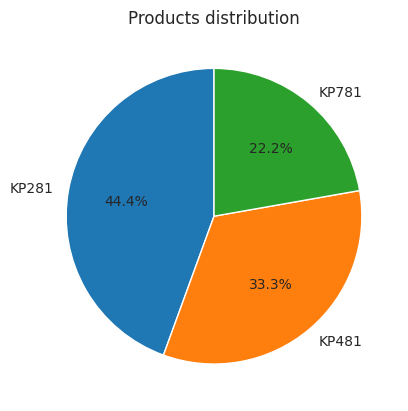

In [242]:
plt.pie(stat, labels=stat.index, autopct='%1.1f%%', startangle=90)
plt.title('Products distribution')
plt.show()


44.44% of customers bought KP281 product type 33.33% of customers bought KP481 product type 22.22% of customers bought KP781 product type

In [243]:
# Customer Gender statistics (listed in %)
gender = df['Gender'].value_counts(normalize=True)
gender_res = gender.map(lambda calc: round(100*calc,2))
gender_res

,proportion
Gender,
Male,57.78
Female,42.22


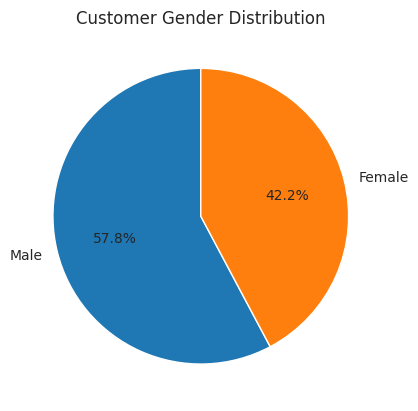

In [244]:
plt.pie(gender_res, labels=gender_res.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Gender Distribution')
plt.show()

57.78% of customers are Male and 42.22% customers are Female



In [261]:
# Customers Marital Status (listed in %)
marital_status = df['MaritalStatus'].value_counts(normalize=True)
marital_status_res = marital_status.map(lambda calc:round(100*calc,2))
marital_status_res


,proportion
MaritalStatus,
Partnered,59.44
Single,40.56


**59.44%** of customers are Married/Partnered **40.56%** of customers are Single

In [246]:
# Usage: Number of days used per week (listed in %)
usage = df['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage


,Usage,proportion
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


In [262]:
# Customer rating of their fitness (listed in %)
rating = df['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating


,Fitness,proportion
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11



1.More than 53% of customers have rated themselves as average in fitness (rated 3) 2.14% of customers have rated their fitness less than average 3.Over 17% of customers have peak fitness ratings

Visual Analysis - Univariate & Bivariate

Univariate Analysis

For Continous Variable(s):Distplot, countplot, histogram for univariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

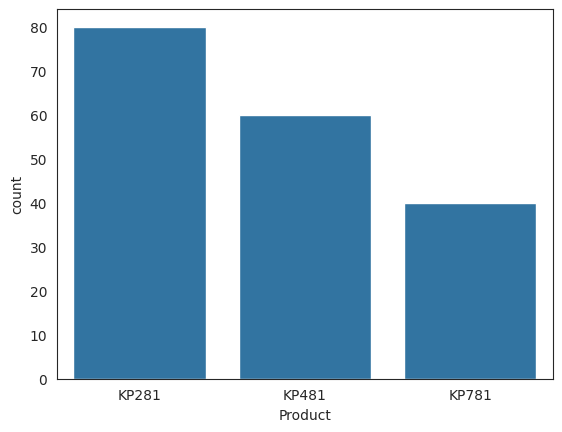

In [263]:
# Product Analysis - count plot
sns.countplot(data=df,x='Product')
plt.show

KP281 is the most commonly purchase product type KP481 is the second most top product type purchased KP781 is the least purchased product type



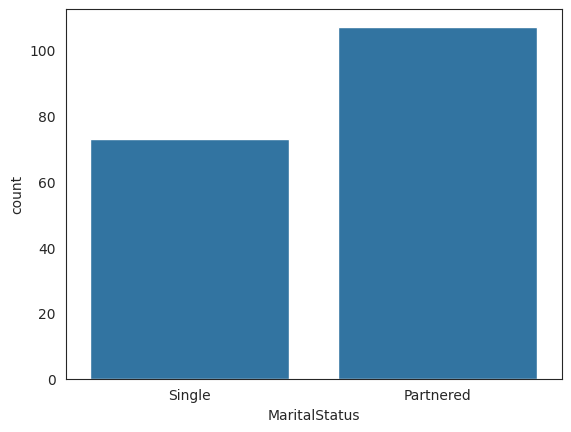

In [249]:
# Marital Status Analysis - Count plot
sns.countplot(data=df,x='MaritalStatus')
plt.show()


Most products purchased by couples/Married/Partnered customer category

<function matplotlib.pyplot.show(close=None, block=None)>

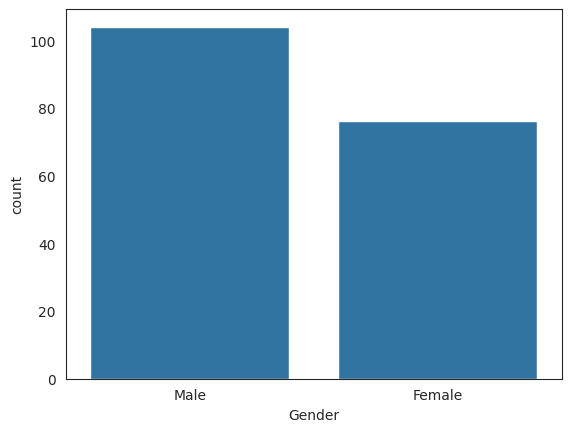

In [264]:
# Gender Analysis - Count Plot
sns.countplot(data=df,x='Gender')
plt.show

Most products purchased by Males, females are less interested in the product compared to Males



<function matplotlib.pyplot.show(close=None, block=None)>

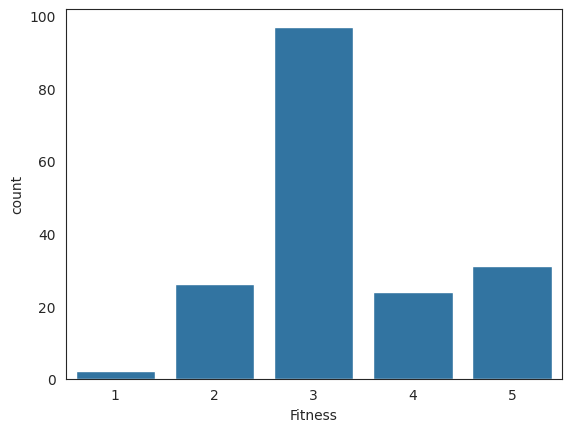

In [265]:
# Fitness rating analysis - count plot
sns.countplot(data=df,x='Fitness')
plt.show

More than 90 customers have rated their physical fitness rating as Average Excellent shape is the second highest rating provided by the customers

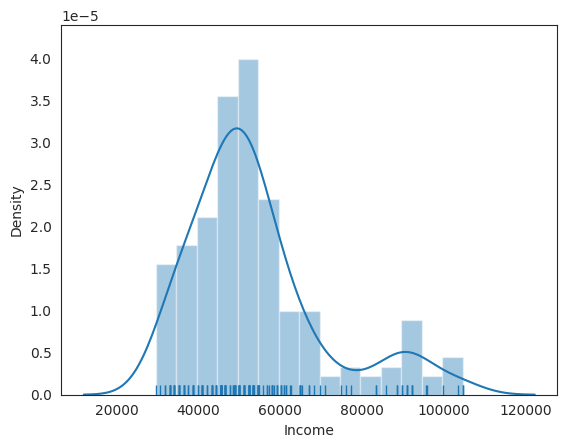

In [252]:
# Income Analysis - Distplot
sns.distplot(df.Income,rug=True)
plt.show()


Most of customers who have purchased the product have a average income between 40K to 60K Average Income density is over 3.0

<Axes: xlabel='Income', ylabel='Count'>

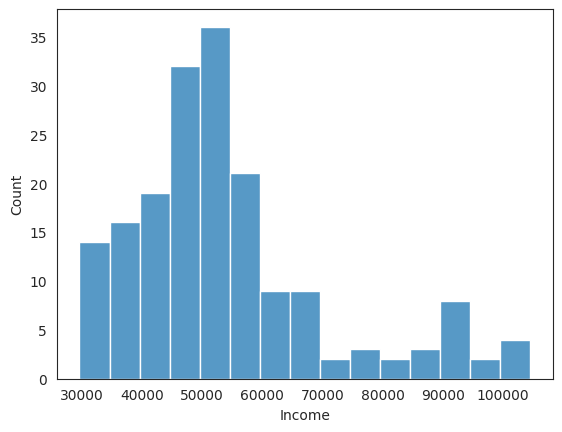

In [253]:
# Income Analysis - Histogram
sns.histplot(data=df,x='Income')


More than 35 customers earn 50-55K per year More than 30 customers earn 45-50K per year More than 20 customers earn 55-60K per year



<Axes: xlabel='Education', ylabel='Count'>

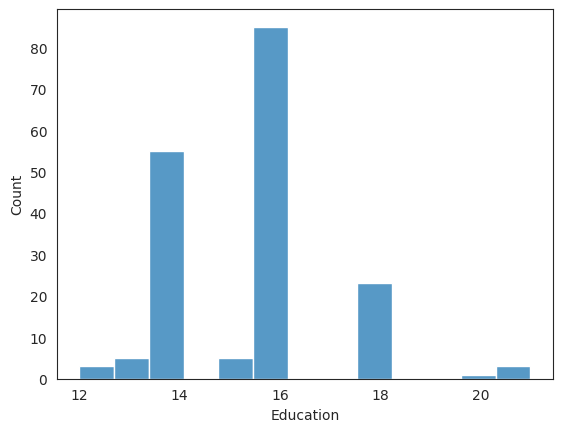

In [254]:

# Education Analysis - Histogram
sns.histplot(data=df,x='Education')


Highest number of customers have 16 as their Education 14 is the second highest education among the customers 20 is the least education among the customers



<Axes: xlabel='Usage', ylabel='Count'>

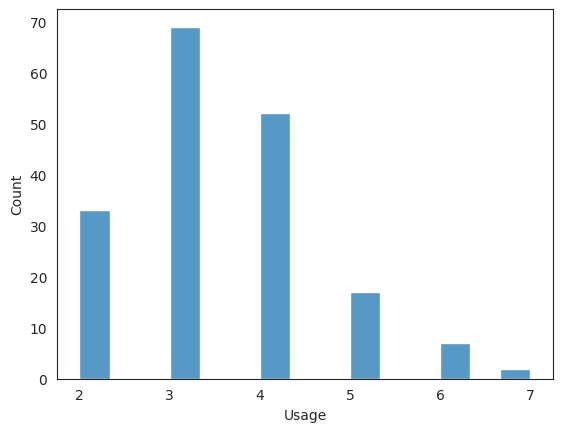

In [255]:
# Usage Analysis - Histogram
sns.histplot(data=df,x='Usage')


3 days per week is the most common usage among the customers 4 days and 2 days per week is the second and third highest usage among the customers Very few customers use product 7 days per week

For categorical variable(s): Boxplot

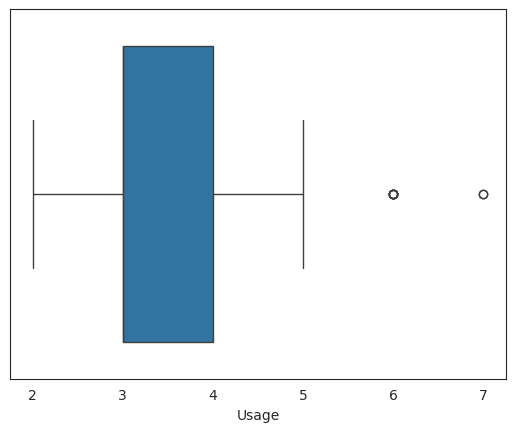

In [256]:
# Usage Analysis - Box plot
sns.boxplot(data=df,x='Usage')
plt.show()

3 to 4 days is the most preferred usage days for customers 6 and 7 days per week is roughly the usage days for few customers (Outliers)



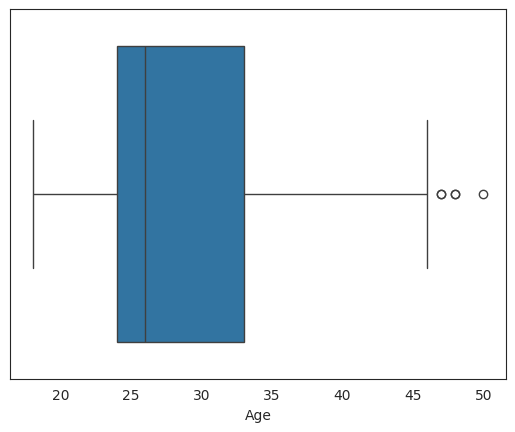

In [257]:
# Age Analysis - Box plot
sns.boxplot(data=df,x='Age')
plt.show()


23 to 34 is the most common customer age group that has purchased the product Above 45 years old customers are very few compared to the young age group given in the dataset

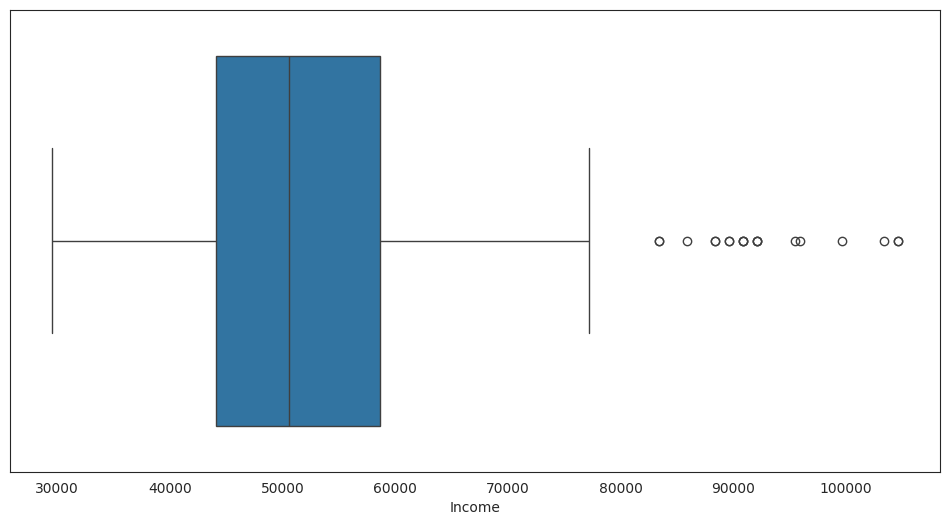

In [258]:
# Income Analysis - Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Income')
plt.show()


Few customers have income above 80K per annum(Outliers) Most customers earn from 45K to around 60K per annum

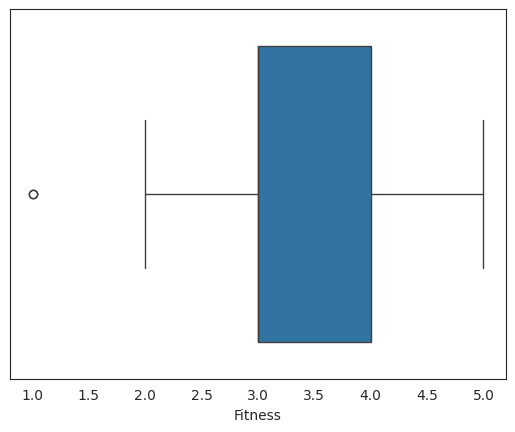

In [259]:
# Fitness Rating Analysis - Box plot
sns.boxplot(data=df,x='Fitness')
plt.show()


Couple of customers have rated their fitness rating as 1 - Poor Shape Most customers have rated fitness rating as 3.0 to 4.0



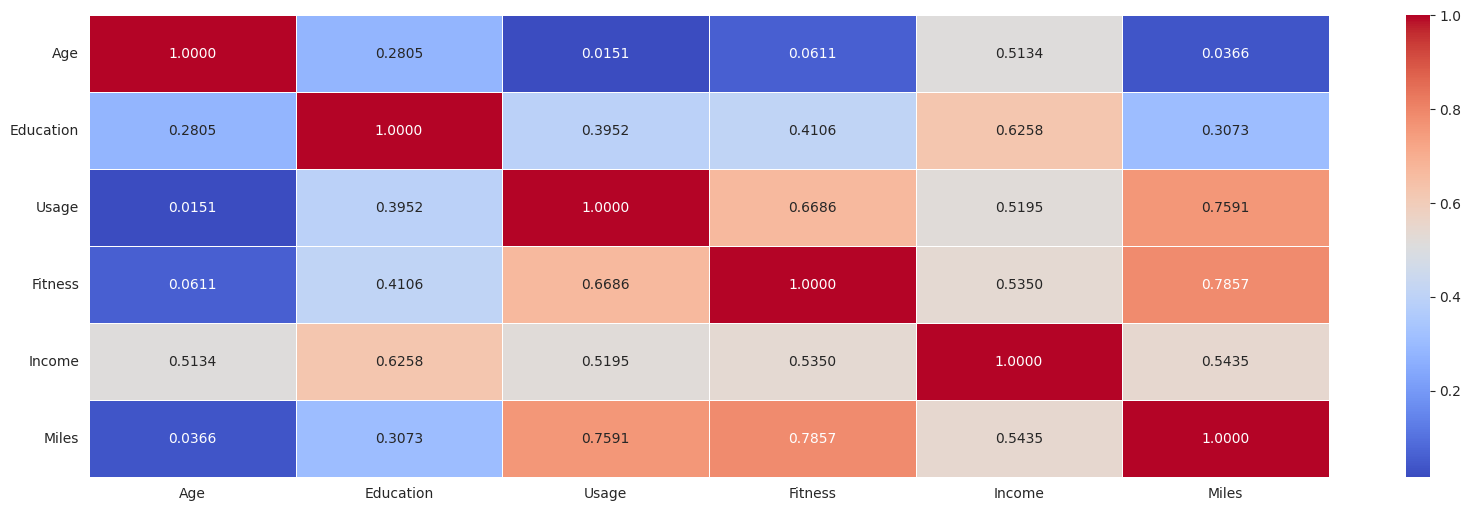

In [260]:
# Handle non-numeric columns before calculating correlation
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns

#Correlation HeatMap
plt.figure(figsize=(20,6))
ax = sns.heatmap(df_numeric.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap linear relationship between data points is evaluated

Correlation between Age and Miles is 0.03

Correlation between Education and Income is 0.62

Correlation between Usage and Fitness is 0.66

Correlation between Fitness and Age is 0.06

Correlation between Income and Usage is 0.51

Correlation between Miles and Age is 0.03

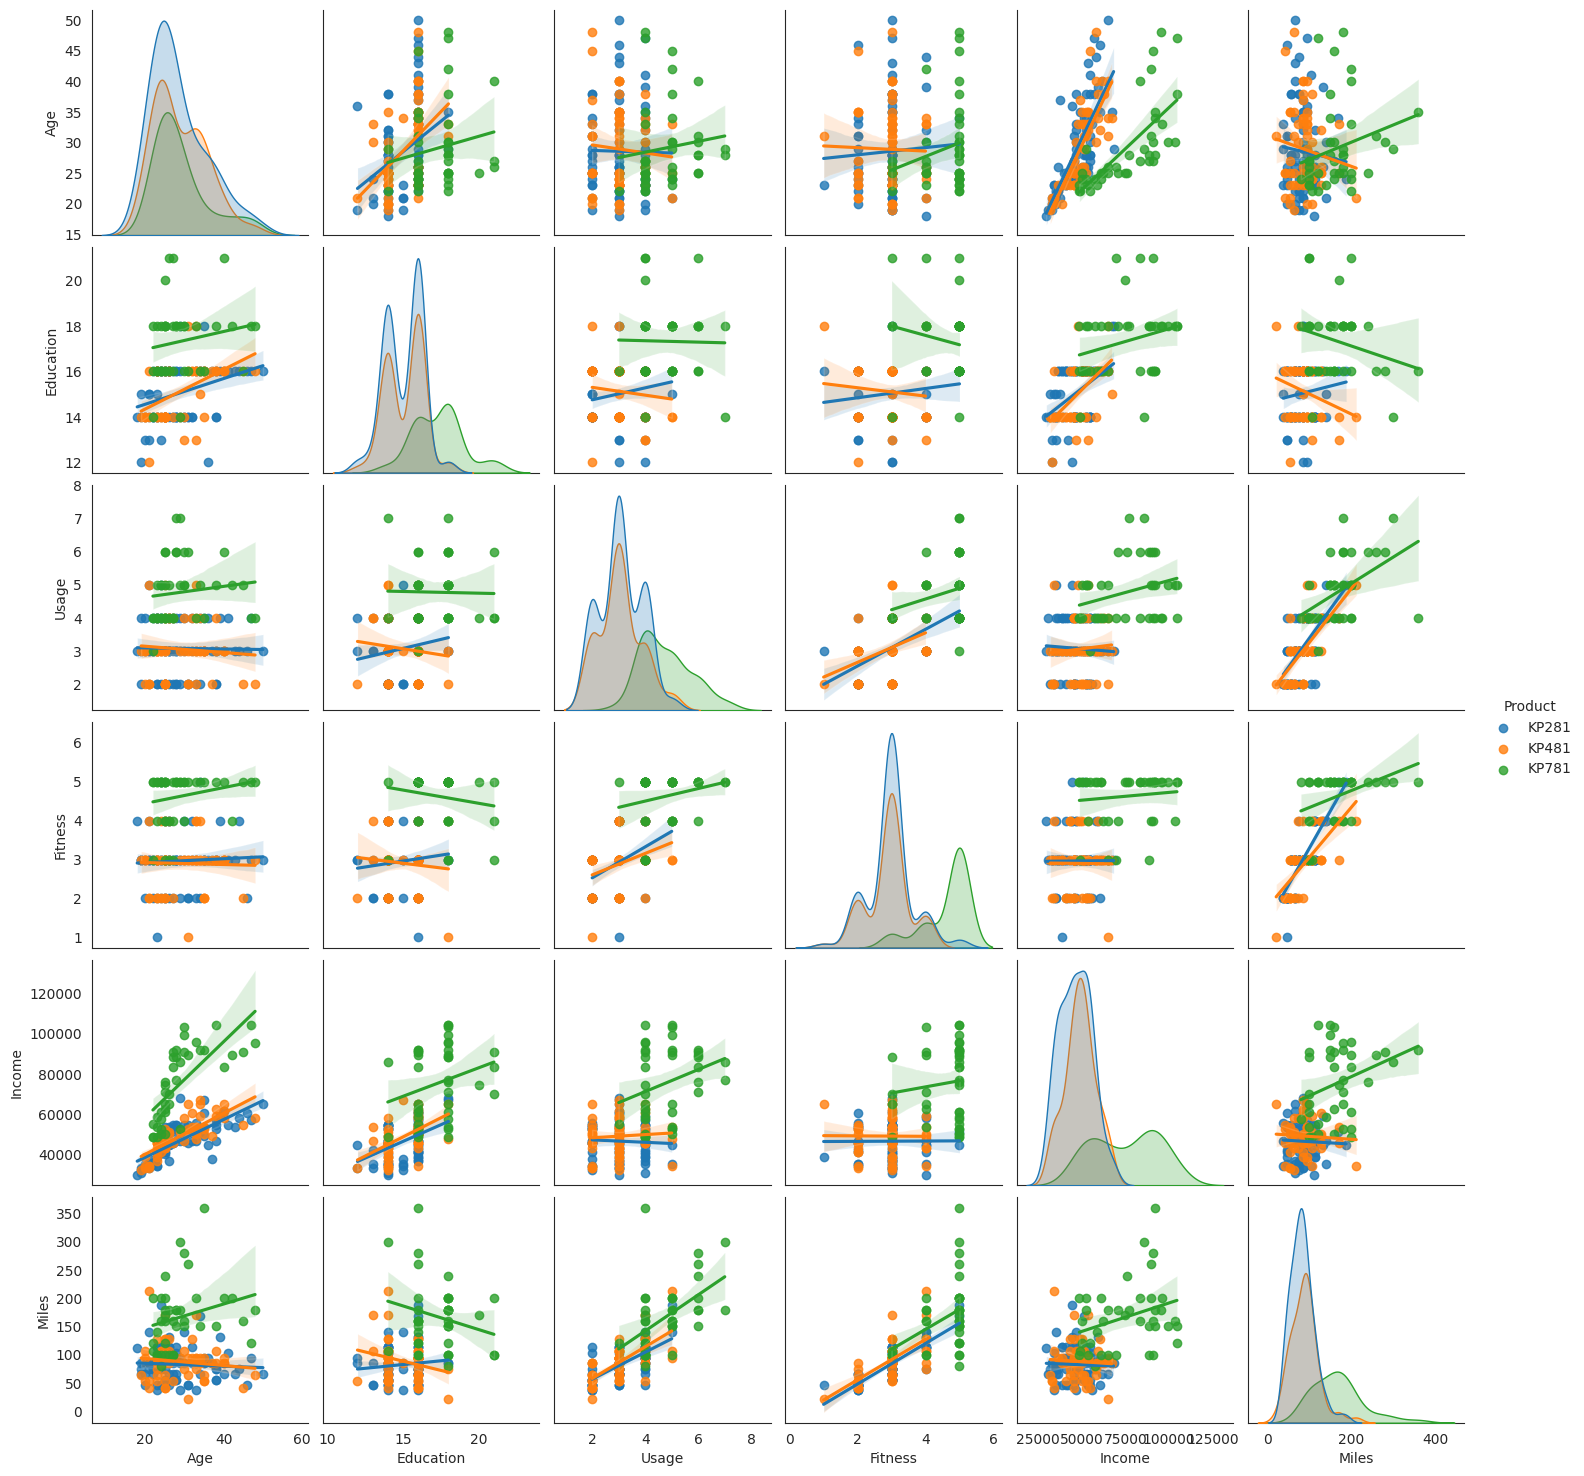

In [178]:
# Product Analysis - Pair Plot
sns.pairplot(df,hue='Product',kind='reg')
plt.show()


In the above pair plot the correlation with other attributes are pivotted around the marital status of the customer



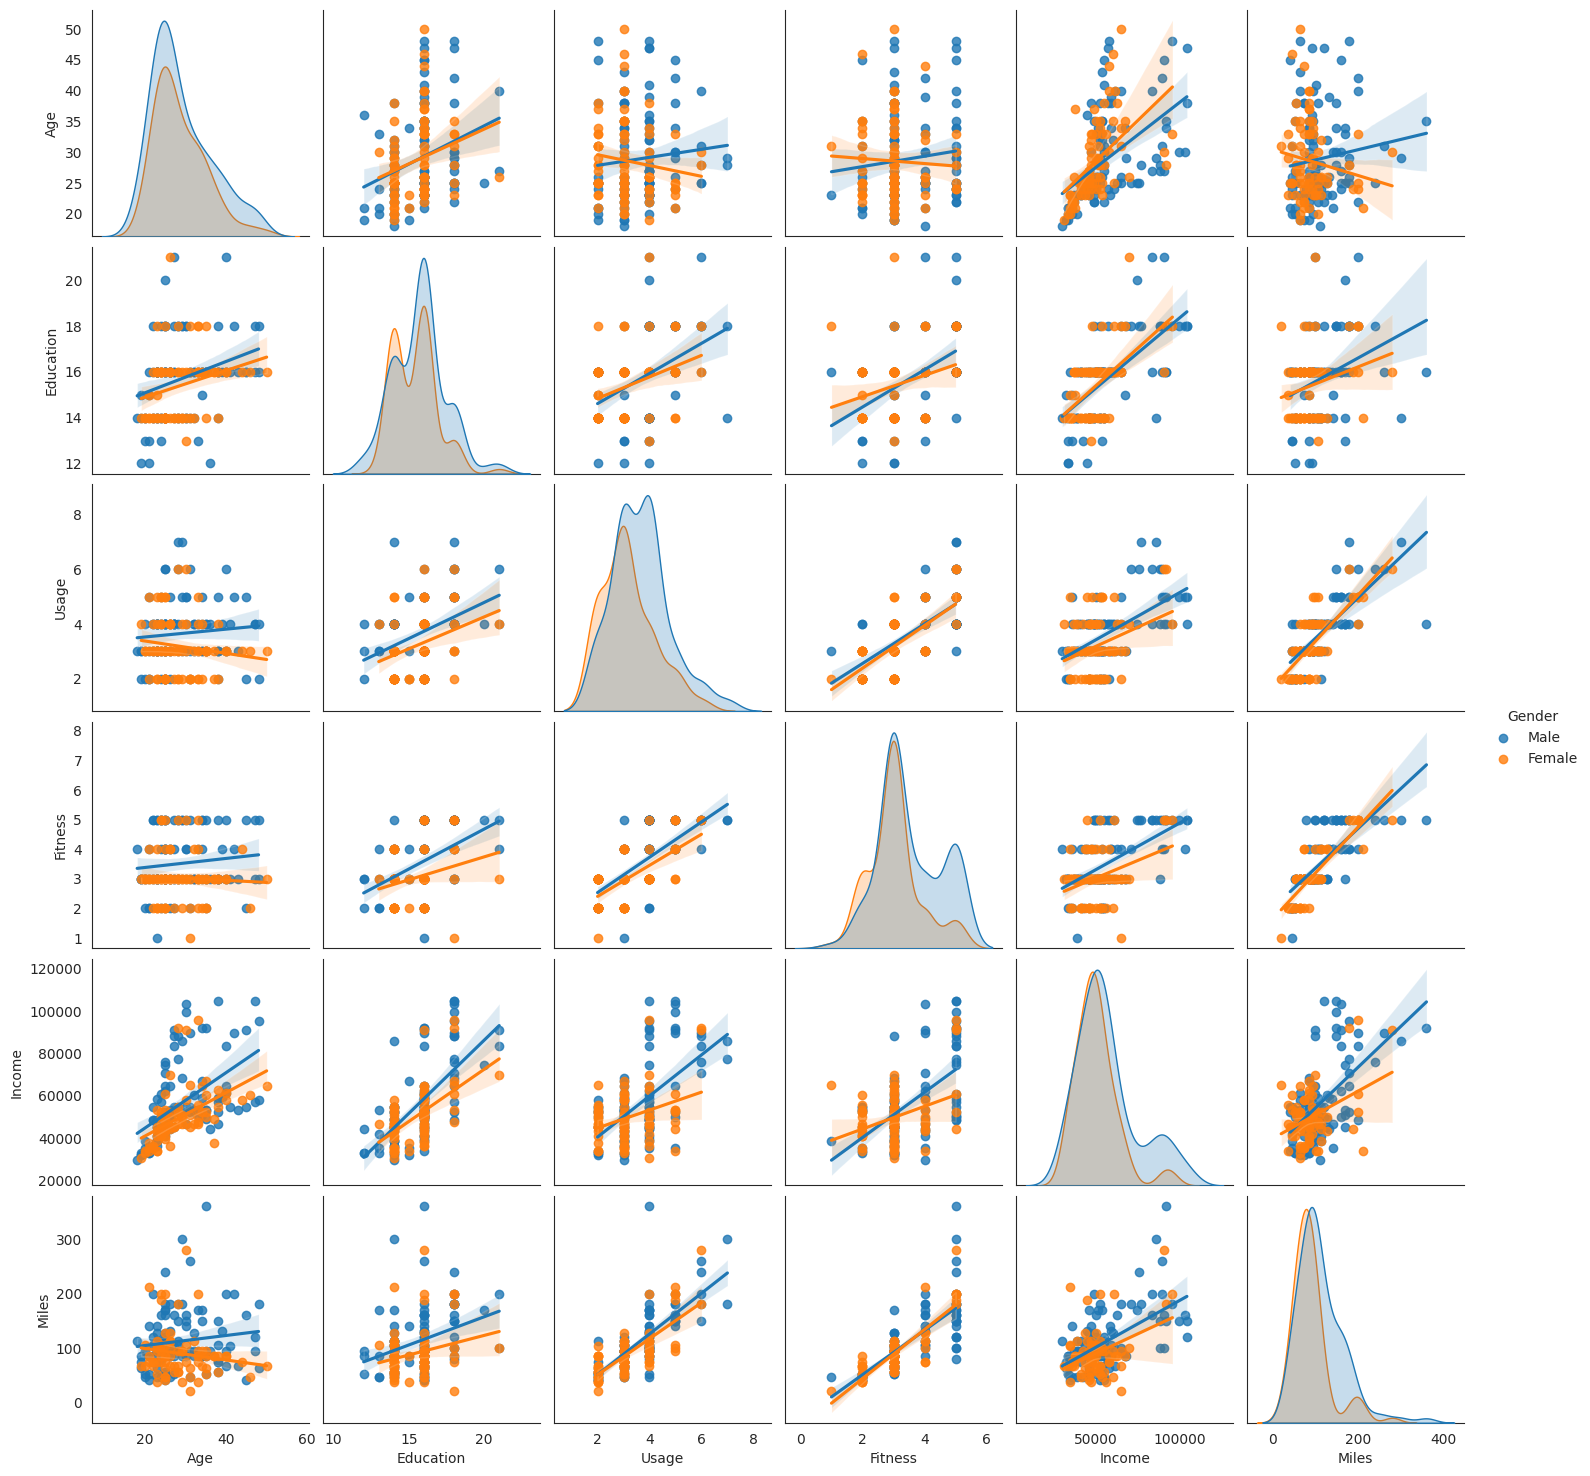

In [179]:
# Gender Analysis - Pair Plot
sns.pairplot(df,hue='Gender',kind='reg')
plt.show()


Here the pair plot's correlation is same as the above mentioned heatmap

Bivariate Analysis

In [180]:
# Average usage of each product type by the customer
df.groupby('Product')['Usage'].mean()


,Usage
Product,
KP281,3.087500
KP481,3.066667
KP781,4.775000


Mean usage for product KP281 is 3.08 Mean usage for product KP481 is 3.06 Mean usage for product KP781 is 4.77



In [181]:
# Average Age of customer using each product
df.groupby('Product')['Age'].mean()


,Age
Product,
KP281,28.55
KP481,28.90
KP781,29.10


Mean Age of the customer who purchased product KP281 is 28.55 Mean Age of the customer who purchased product KP481 is 28.90 Mean Age of the customer who purchased product KP781 is 29.10

In [182]:
# Average Education of customer using each product
df.groupby('Product')['Education'].mean()


,Education
Product,
KP281,15.037500
KP481,15.116667
KP781,17.325000


Mean Education qualification of the customer who purchased product KP281 is 15.03 Mean Education qualification of the customer who purchased product KP481 is 15.11 Mean Education qualification of the customer who purchased product KP781 is 17.32



In [183]:
# Average customer fitness rating for each product type purchased
df.groupby('Product')['Fitness'].mean()


,Fitness
Product,
KP281,2.9625
KP481,2.9000
KP781,4.6250



Customer fitness mean for product KP281 is 2.96 Customer fitness mean for product KP481 is 2.90 Customer fitness mean for product KP781 is 4.62

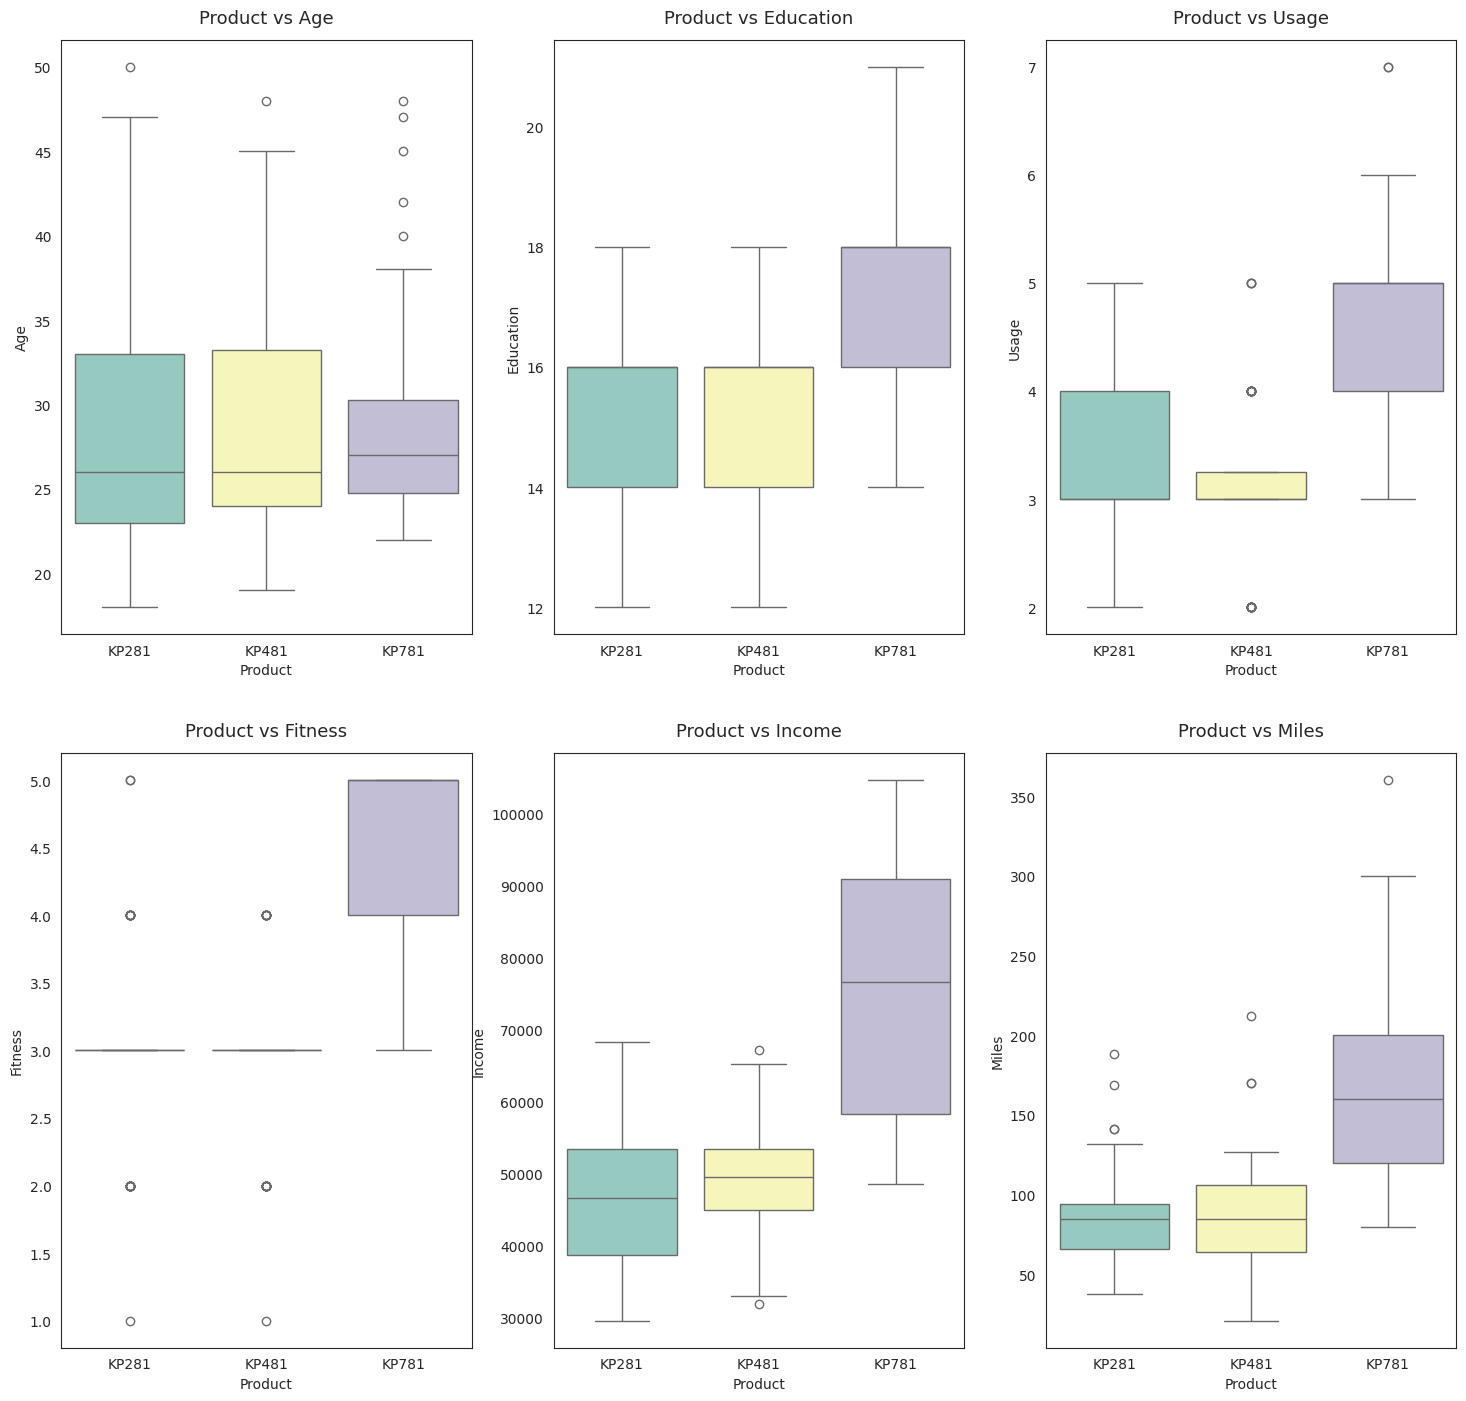

In [184]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1


**Observations**

 Product vs Age Customers purchasing products KP281 & KP481 are having same Age median value. Customers whose age lies between 25-30, are more likely to buy KP781 product Product vs Education Customers whose Education is greater than 16, have more chances to purchase the KP781 product. While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481. Product vs Usage Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product. While the other customers are likely to purchasing KP281 or KP481. Product vs Fitness The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product. Product vs Income Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product. Product vs Miles If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

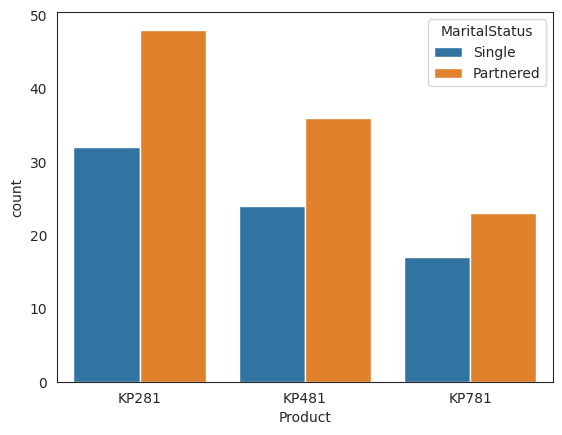

In [185]:
# Product purchased among Married/Partnered and Single
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.show()


From the above countplot

KP281 is the most preferred product among customers
KP481 is the second most preferred product among the customers
Between Singles and Partnered, Partnered customers are the major product purchasers


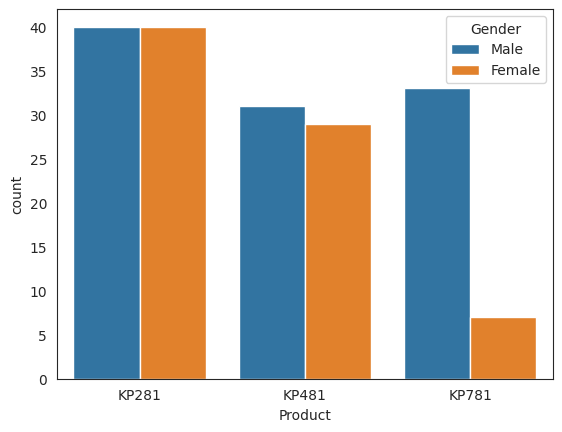

In [186]:
# Product purchased among Male and Female
sns.countplot(data=df,x='Product',hue='Gender')
plt.show()


KP281 Product is the equally preferred by both male and female genders KP781 Product is mostly preferred among the Male customers Overall Male customers are the highest product purchasers

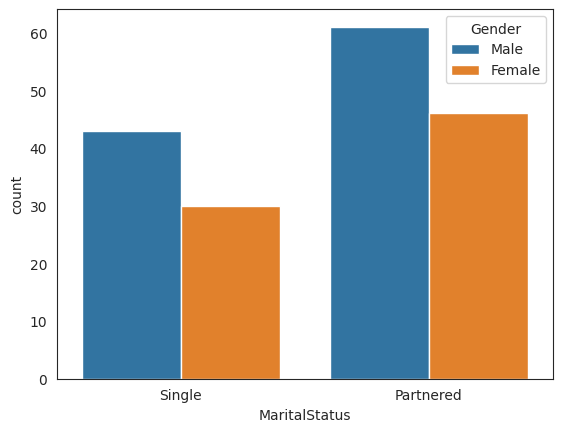

In [187]:
# Count among Gender and their Marital Status
sns.countplot(data=df,x='MaritalStatus',hue='Gender')
plt.show()


Partnered customers are the most buyers of aerofit product

Out of both Single and Partnered customers, Male customers are significantly high

Female customers are considerably low compared to Male customers

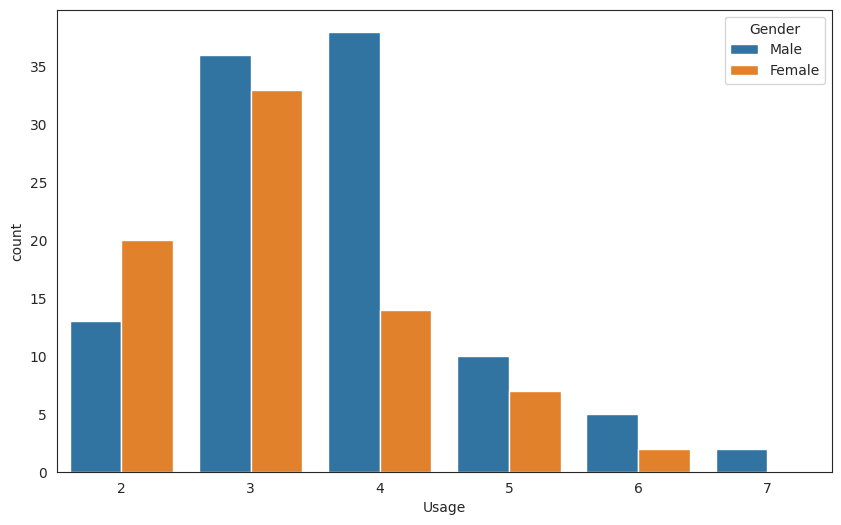

In [188]:
# Purchased product usage among Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Usage',hue='Gender')
plt.show()


Among Male and Female genders, Male's usage is 4 days per week

Female customers mostly use 3 days per week

Only few Male customers use 7 days per week whereas female

customer's maximum usage is only 6 days per week

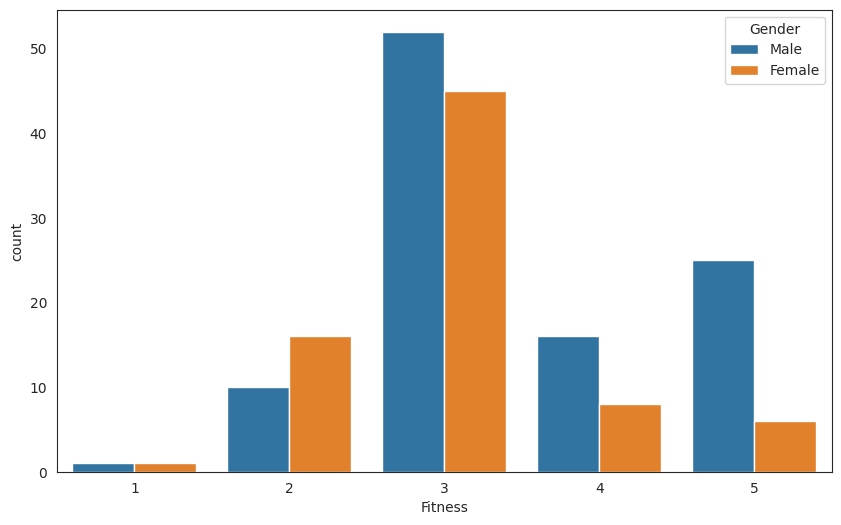

In [189]:
# Fitness rating among the customers categorised by Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Fitness',hue='Gender')
plt.show()


Among the fitness rating both Male and Female most have rated as average

Significant number of Male customers are at Excellent shape compared to Female customers

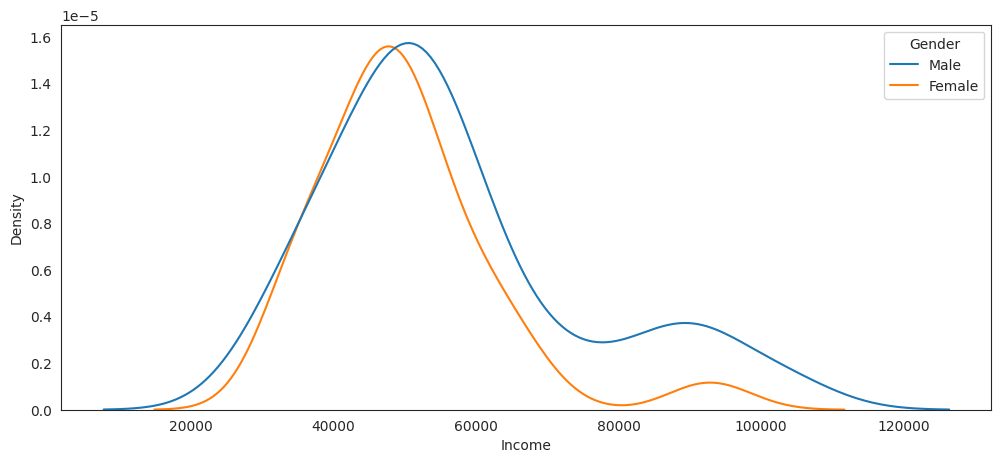

In [190]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Income',hue='Gender')
plt.show()


om the above diagram, we can conclude the spike from 40K to around 80K is the most common income per annum of the customers

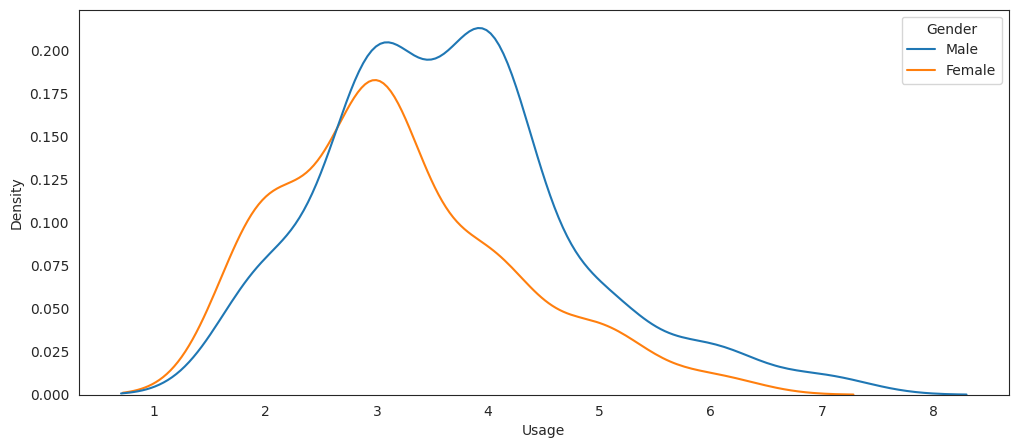

In [191]:
# Product purchased Customers Usage per week and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Usage',hue='Gender')
plt.show()


Male customers usage is significantly higher the female customer
Female customer's lack consistency after the 3 days per week

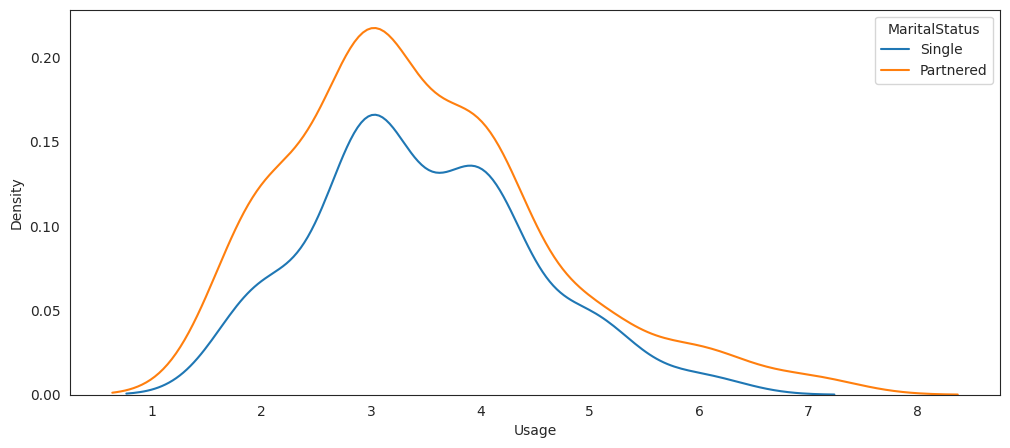

In [192]:
# Product purchased Customers Usage per week and their Marital Status
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Usage',hue='MaritalStatus')
plt.show()


Partnered customers usage is higher than single customers Partnered customers also have greater consistency per week of 7 days per week than single customers



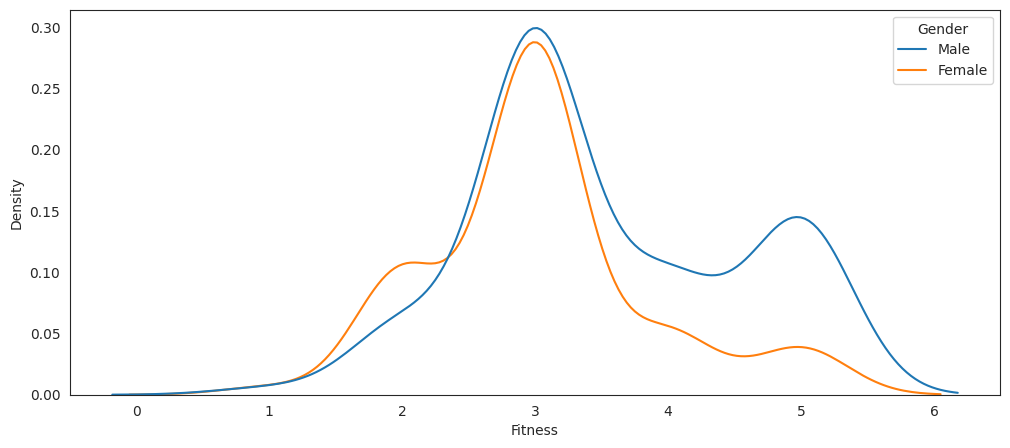

In [193]:
# Product purchased Customers Fitness Rating and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Fitness',hue='Gender')
plt.show()


- Male customers are in better shape the female customers
- Though Female customers do not have poor shape, they are also not in excellent shape
- Some Male customers excellent body shape and few customers have poor shape as well


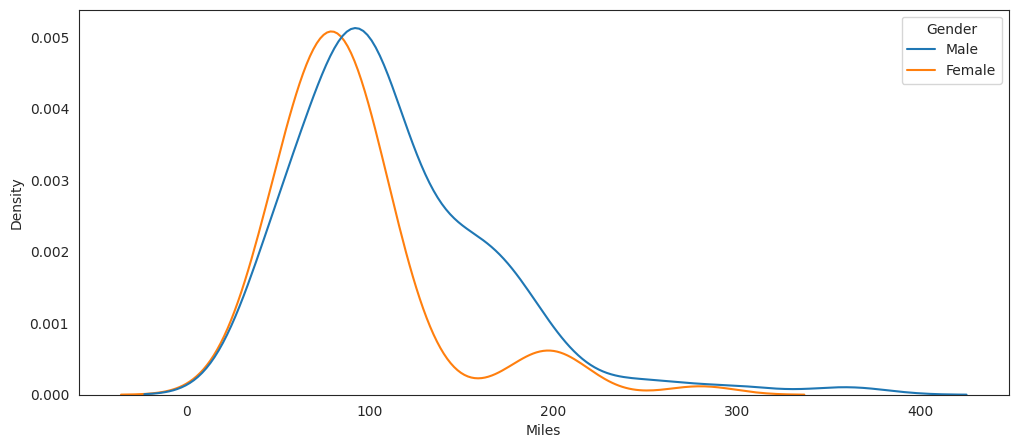

In [194]:
# Distance covered by each Gender among the customers
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Miles',hue='Gender')
plt.show()


Male customers have a consistent distance coverage than female customers Female customers have max distance covered as just over 300 miles

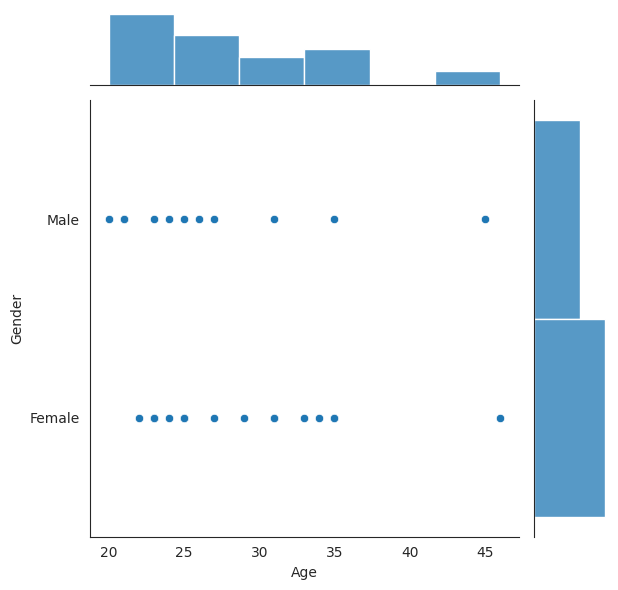

In [195]:
# Scatterplot for customers Gender and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Age',y='Gender',data=df[df.Fitness<3])
plt.show()


Above Joint plot describes the relationship between the customer age and their gender grouping. Product is not familiar with older or middle age womens



<Axes: xlabel='Education', ylabel='Age'>

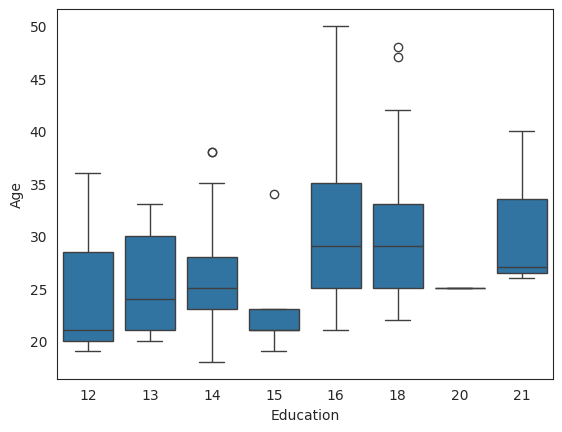

In [196]:
sns.boxplot(x='Education',y='Age',data=df)


Above box plot shows Education data against Age of the customer

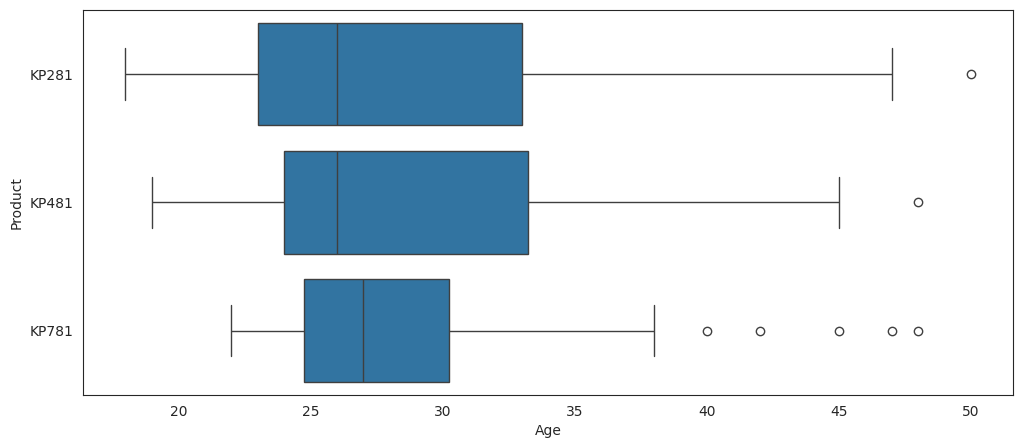

In [197]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Age',y='Product',data=df)
plt.show()


Roughly few customers with age above 40 use product KP781 Most of the customers are comfortable with KP281 product type KP481 is the second highest popular product among the younger side of the customer



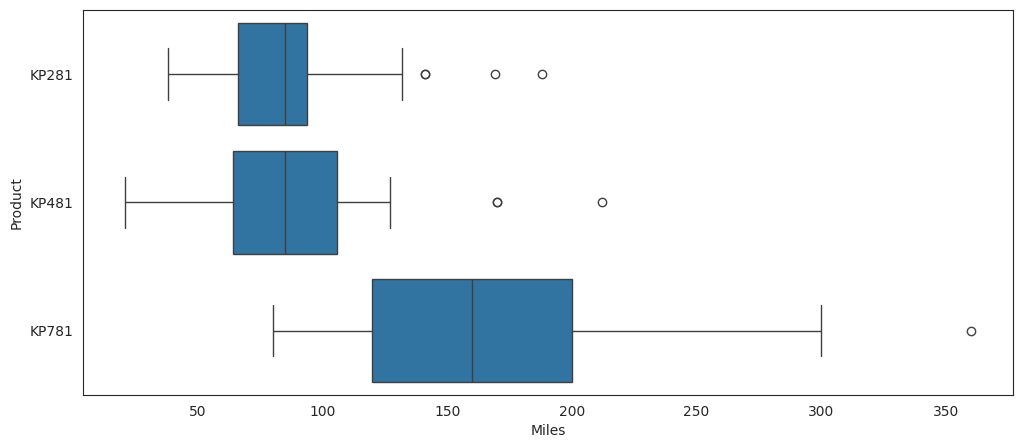

In [198]:
# Miles with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Miles',y='Product',data=df)
plt.show()


- Customers with product KP781, has been able to cover more miles than other two product types

- KP481 product is the second most highest miles covering product among the customers

- KP281 product customer had covered less distance compared with other two product types

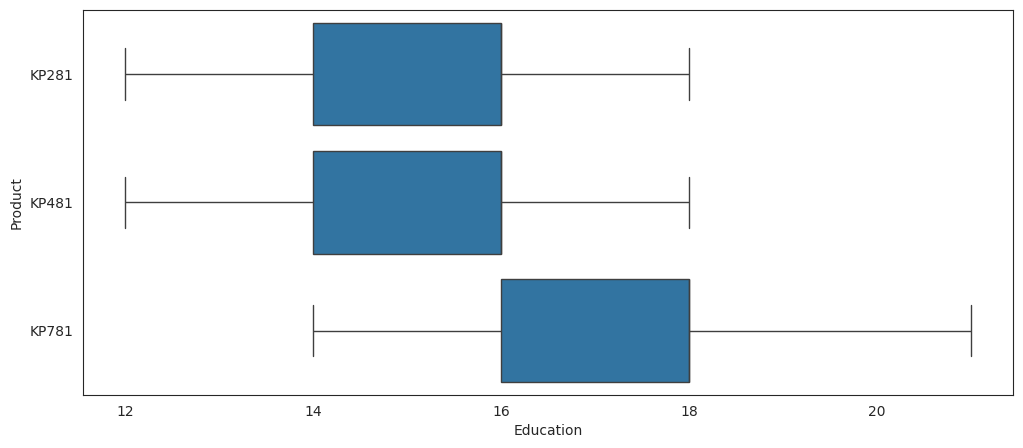

In [199]:
# Education of customers with each product purchased
plt.figure(figsize=(12,5))
sns.boxplot(x='Education',y='Product',data=df)
plt.show()

- Customers with Higher education of 16 to 18 have preferred mostly product type KP781

- Customers with education between 14 to 16 prefer KP281 and KP481 equally

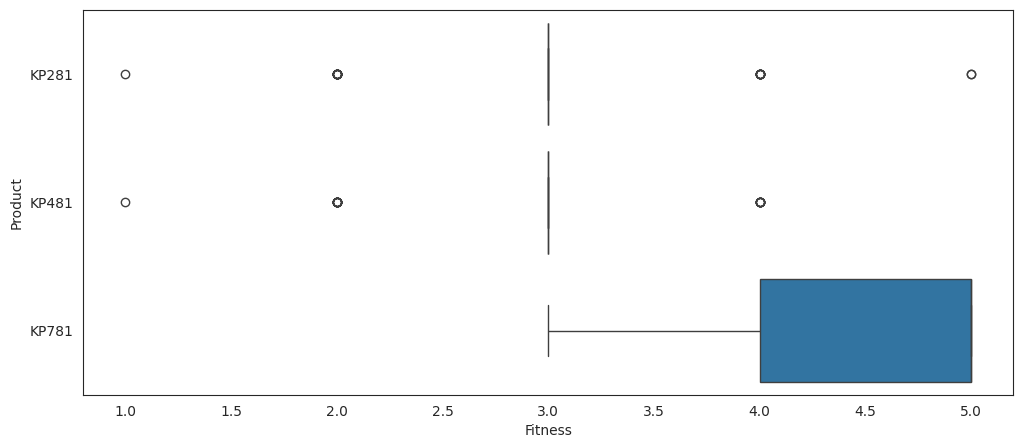

In [200]:
# Fitness of customer with each product
plt.figure(figsize=(12,5))
sns.boxplot(x='Fitness',y='Product',data=df)
plt.show()


- Customers with excellent shape are significantly using KP781 product type

- KP481 and KP281 product type are scattered across the fitness rating

Multivariate Analysis

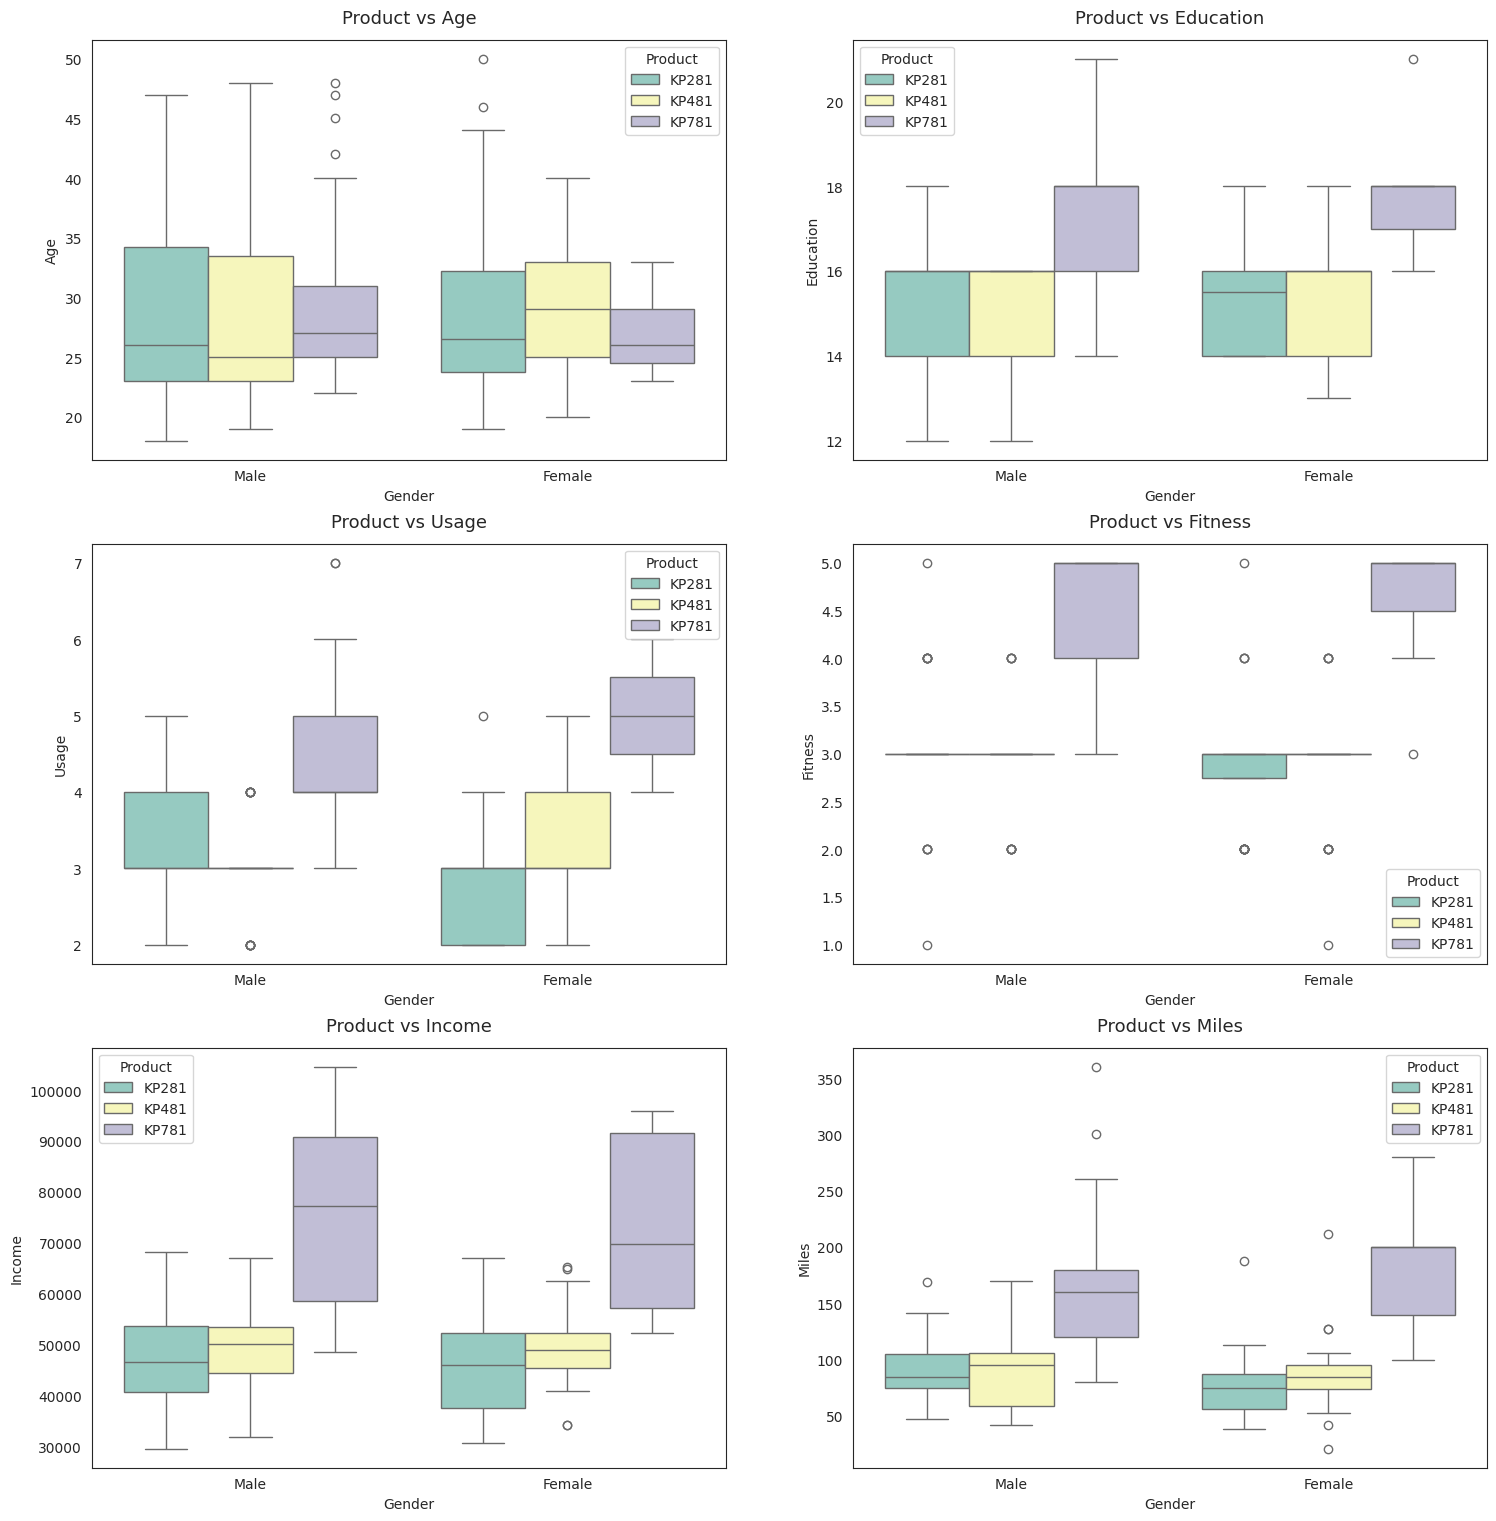

In [201]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1


Obervations Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product



**Missing Value & Outlier Detection**

In [202]:
df.isna().sum()


,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0
Fitness_category,0


No Null values found in any columns



In [203]:
df.duplicated().sum()


0

No duplicates have been observed

In [204]:
# Outlier calculation for Miles using Inter Quartile Range
q_75, q_25 = np.percentile(df['Miles'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Miles is", miles_iqr)


Inter Quartile Range for Miles is 48.75


**Business Insights based on Non-Graphical and Visual Analysis**

In [205]:
df.Product.value_counts(normalize=True)


,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


Probability of buying KP281, KP481 & KP781 are 0.44, 0.33 & 0.22 respectively



In [206]:
df.Gender.value_counts(normalize=True)

,proportion
Gender,
Male,0.577778
Female,0.422222


- Probability of Male customer is 0.57
- Probability of Female customer is 0.42

In [207]:
df.MaritalStatus.value_counts(normalize=True)

,proportion
MaritalStatus,
Partnered,0.594444
Single,0.405556


Probability of Married/Partnered is 0.59 Probability of Single is 0.40

Probability of each product given gender

In [208]:
def gender_Probability(gender,df):
    print(f"Prob P(KP781) for {gender}: {round(df['KP781'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP481) for {gender}: {round(df['KP481'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP281) for {gender}: {round(df['KP281'][gender]/df.loc[gender].sum(),3)}")

df_temp = pd.crosstab(index=df['Gender'],columns=[df['Product']])
print("Prob of Male: ",round(df_temp.loc['Male'].sum()/len(df),3))
print("Prob of Female: ",round(df_temp.loc['Female'].sum()/len(df),3))
print()
gender_Probability('Male',df_temp)
print()
gender_Probability('Female',df_temp)

Prob of Male:  0.578
Prob of Female:  0.422

Prob P(KP781) for Male: 0.317
Prob P(KP481) for Male: 0.298
Prob P(KP281) for Male: 0.385

Prob P(KP781) for Female: 0.092
Prob P(KP481) for Female: 0.382
Prob P(KP281) for Female: 0.526


Probability of each product for given Marital Status

In [209]:
def MS_Probability(ms_status,df):
    print(f"Prob P(KP781) for {ms_status}: {round(df['KP781'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP481) for {ms_status}: {round(df['KP481'][ms_status]/df.loc[ms_status].sum(),3)}")
    print(f"Prob P(KP281) for {ms_status}: {round(df['KP281'][ms_status]/df.loc[ms_status].sum(),3)}")

df_temp = pd.crosstab(index=df['MaritalStatus'],columns=[df['Product']])
print("Prob of P(Single): ",round(df_temp.loc['Single'].sum()/len(df),3))
print("Prob of P(Married/Partnered): ",round(df_temp.loc['Partnered'].sum()/len(df),3))
print()
MS_Probability('Single',df_temp)
print()
MS_Probability('Partnered',df_temp)

Prob of P(Single):  0.406
Prob of P(Married/Partnered):  0.594

Prob P(KP781) for Single: 0.233
Prob P(KP481) for Single: 0.329
Prob P(KP281) for Single: 0.438

Prob P(KP781) for Partnered: 0.215
Prob P(KP481) for Partnered: 0.336
Prob P(KP281) for Partnered: 0.449


Customer Age Group Analysis

In [210]:
df_cat['age_group'] = df_cat.Age
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,20


In [211]:
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age
df_cat.age_group = pd.cut(df.age_group,bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])

In [212]:
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen


In [213]:
df_cat.age_group.value_counts()


,count
age_group,
Adult,135
Middle Aged,22
Teen,17
Elder,6


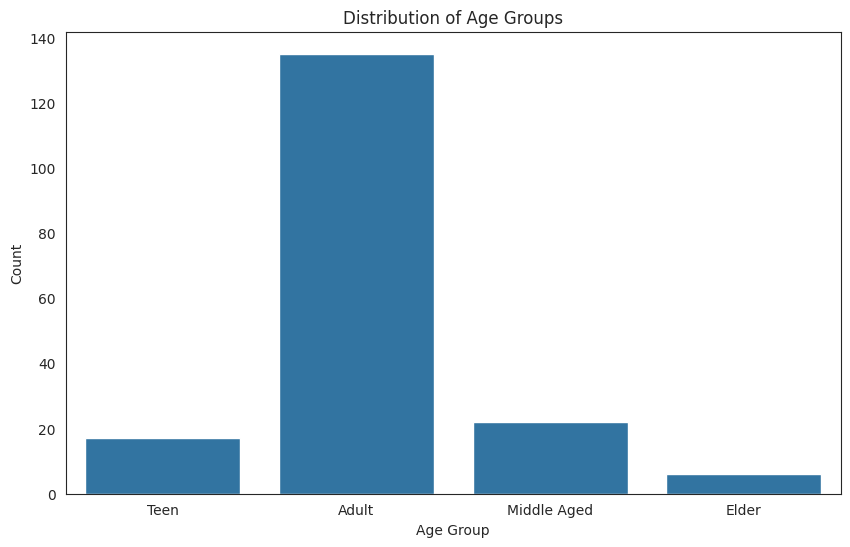

In [214]:
# Bar plot for age_group counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cat, x='age_group')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [215]:
df_cat.loc[df_cat.Product=='KP281']["age_group"].value_counts()

,count
age_group,
Adult,56
Middle Aged,11
Teen,10
Elder,3


In [216]:
df_cat.loc[df_cat.Product=='KP481']["age_group"].value_counts()

,count
age_group,
Adult,45
Teen,7
Middle Aged,7
Elder,1


In [217]:
df_cat.loc[df_cat.Product=='KP781']["age_group"].value_counts()

,count
age_group,
Adult,34
Middle Aged,4
Elder,2
Teen,0


In [218]:
pd.crosstab(columns=df_cat["Fitness_category"],index=df_cat["Product"])

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape
Product,,,,,
KP281,54,14,2,9,1
KP481,39,12,0,8,1
KP781,4,0,29,7,0


In [219]:
pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender)

Gender                    Female  Male
Product Fitness_category              
KP281   Average Shape         26    28
        Bad Shape             10     4
        Excellent Shape        1     1
        Good Shape             3     6
        Poor Shape             0     1
KP481   Average Shape         18    21
        Bad Shape              6     6
        Good Shape             4     4
        Poor Shape             1     0
KP781   Average Shape          1     3
        Excellent Shape        5    24
        Good Shape             1     6

**Conditional and Marginal Probabilities**

**Two-Way Contingency Table**

**Marginal Probabilities**

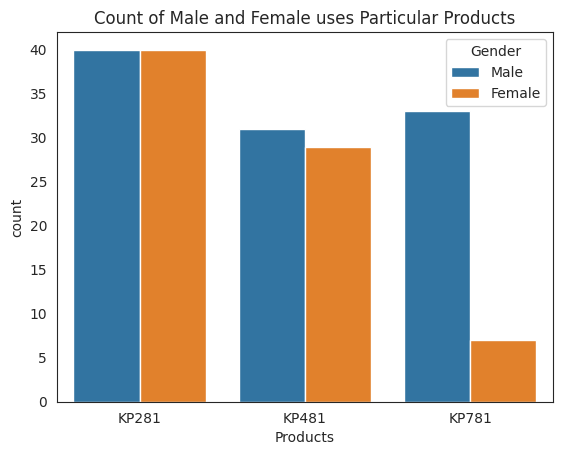

In [220]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [221]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [222]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


**Marginal Probability**

- Probability of Male Customer Purchasing any product is : 57.77 %

- Probability of Female Customer Purchasing any product is : 42.22 %

**Marginal Probability of any customer buying**

- product KP281 is : 44.44 % (cheapest / entry level product)

- product KP481 is : 33.33 % (intermediate user level product)

- product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)









**Conditional Probabilities**


In [223]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


**Probability of Selling Product**

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

**Objective:**

Customer Profiling for Each Product
Customer profiling based on the 3 product categories provided

**KP281**

- Easily affordable entry level product, which is also the maximum selling product.

- KP281 is the most popular product among the entry level customers.

- This product is easily afforded by both Male and Female customers.

- Average distance covered in this model is around 70 to 90 miles.

- Product is used 3 to 4 times a week.

- Most of the customer who have purchased the product have rated Average shape as the fitness rating.

- Younger to Elder beginner level customers prefer this product.

- Single female & Partnered male customers bought this product more than single male customers.

- Income range between 39K to 53K have preferred this product.

**KP481**

- This is an Intermediate level Product.

- KP481 is the second most popular product among the customers.

- Fitness Level of this product users varies from Bad to Average Shape depending on their usage.

- Customers Prefer this product mostly to cover more miles than fitness.

- Average distance covered in this product is from 70 to 130 miles per week.

- More Female customers prefer this product than males.

- Probability of Female customer buying KP481 is significantly higher than male.

- KP481 product is specifically recommended for Female customers who are intermediate user.

- Three different age groups prefer this product - Teen, Adult and middle aged.

- Average Income of the customer who buys KP481 is 49K.

- Average Usage of this product is 3 days per week.

- More Partnered customers prefer this product.

- There are slightly more male buyers of the KP481.

- The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.

- The buyers of KP481 in Single & Partnered, Male & Female are same.

- The age range of KP481 treadmill customers is roughly between 24-34 years.

**KP781**

- Due to the High Price & being the advanced type, customer prefers less of this product.

- Customers use this product mainly to cover more distance.

- Customers who use this product have rated excelled shape as fitness rating.

- Customer walk/run average 120 to 200 or more miles per week on his product.

- Customers use 4 to 5 times a week at least.

- Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.

- Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

- Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.

- Middle aged to higher age customers tend to use this model to cover more distance.

- Average Income of KP781 buyers are over 75K per annum

- Partnered Female bought KP781 treadmill compared to Partnered Male.

- Customers who have more experience with previous aerofit products tend to buy this product

- This product is preferred by the customer where the correlation between Education and Income is High.

**Recommendation**

- Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more

- KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.

- As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.

- KP781 product should be promotted using influencers and other international atheletes.

- Research required for expanding market beyond 50 years of age considering health pros and cons.

- Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.

- KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.

- Target the Age group above 40 years to recommend Product KP781.